## Charts in Matplotlib

1. Bar Chart
2. Pie Chart
3. Histogram
4. scatter plot
5. line-plot
6. Box-plot

In [6]:
# Load data
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('auto.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [7]:
df.shape

(205, 26)

Using pandas u have to first get data in a format that is required by specific chart.

In [8]:
# To make a bar plot, u need to extract series/col from df
make_series = df['make'].value_counts() # each column of a df is a series
print(make_series)
print(type(make_series))

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64
<class 'pandas.core.series.Series'>


To access data in a Series/single column use series_name.index and series_name.values.
If access data in Dataframe can directly use col_name.value_counts().

In [9]:
print(make_series.index)

Index(['toyota', 'nissan', 'mazda', 'mitsubishi', 'honda', 'volkswagen',
       'subaru', 'peugot', 'volvo', 'dodge', 'mercedes-benz', 'bmw', 'audi',
       'plymouth', 'saab', 'porsche', 'isuzu', 'jaguar', 'chevrolet',
       'alfa-romero', 'renault', 'mercury'],
      dtype='object')


In [10]:
print(make_series.values)

[32 18 17 13 13 12 12 11 11  9  8  8  7  7  6  5  4  3  3  3  2  1]


### Bar Plot

### Three methods of Plotting-
1. Explicit method - using object-oriented approach-fig, axes
2. Implicit method - directly using pyplot
3. Using Pandas Inbuilt plotting (can still use pyplot characteristics with it)

Explicit method is most recommended, since most flexible.

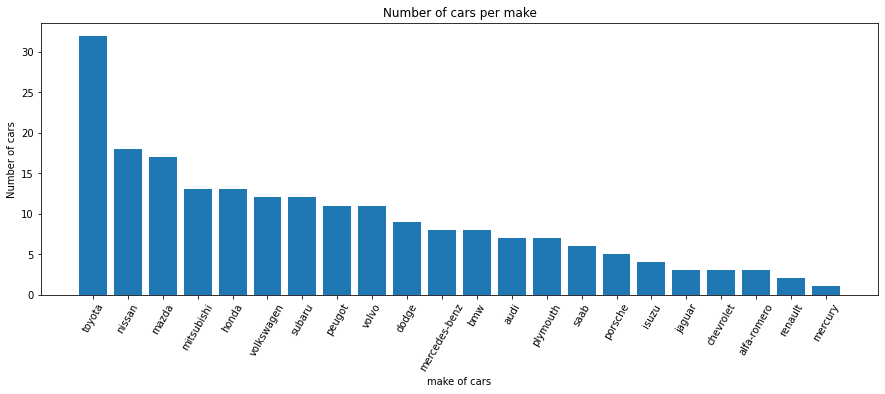

In [11]:
# Method 1 - Explicit method
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(make_series.index, make_series.values) # x,height - x-> names, height-> count
ax.tick_params(axis='x',rotation=60)  # currently at 0 degree i.e. horizontal
ax.set_title('Number of cars per make')
ax.set_xlabel('make of cars')
ax.set_ylabel('Number of cars');


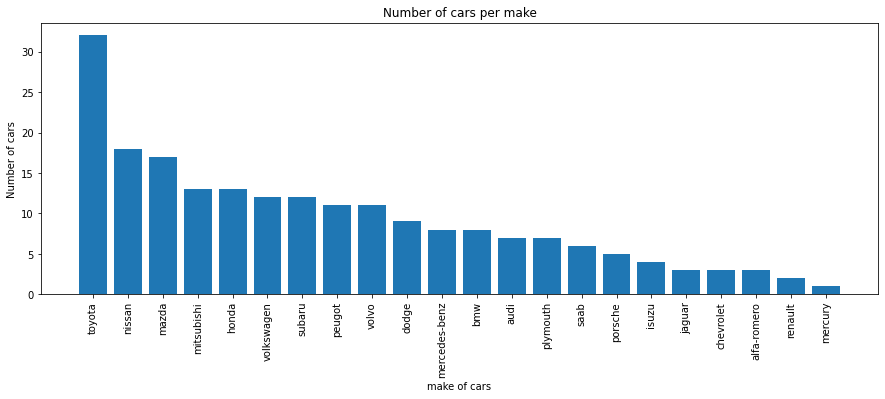

In [12]:
# Method 2 - Implicit method

plt.figure(figsize=(15,5))
plt.bar(make_series.index, make_series.values),
plt.title('Number of cars per make')
plt.xlabel('make of cars')
plt.ylabel('Number of cars')
plt.xticks(rotation=90);


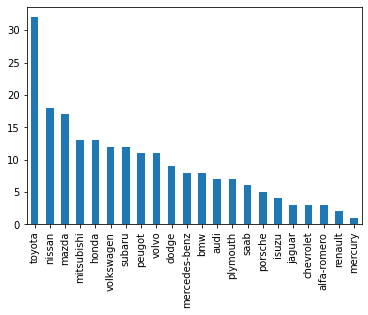

In [13]:
# Method 3 - Making use of Pandas (internally pandas use matplotlib)
make_series.plot(kind='bar');      # series_name.plot

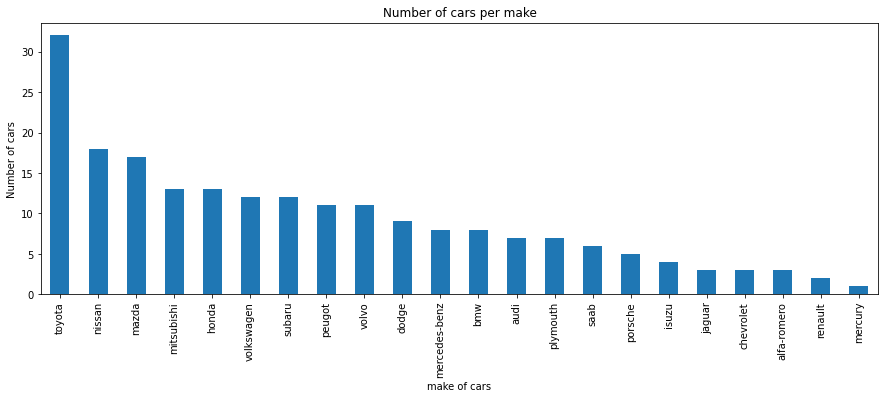

In [14]:
## Method 3 - You can use matplotlib around this pandas.

plt.figure(figsize=(15,5))
make_series.plot(kind='bar')
plt.title('Number of cars per make')
plt.xlabel('make of cars')
plt.ylabel('Number of cars');

### Pie Chart

In [15]:
fuel_series = df['fuel-type'].value_counts()
fuel_series

gas       185
diesel     20
Name: fuel-type, dtype: int64

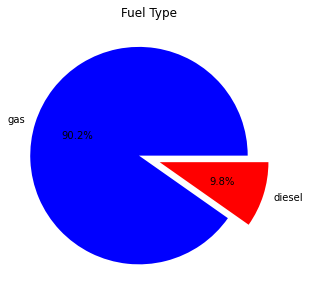

In [41]:
# Method 1 - Explicit method

fig,ax = plt.subplots(figsize=(5,5))
ax.pie(x=fuel_series.values,labels=fuel_series.index, autopct='%1.1f%%',colors=['blue','red'],explode=(0.1,0.1))
ax.set_title('Fuel Type');  # There is only 1 dimension x in pie-fuel_series.values

# Here only 2 wedges, in application where u have many wedges, explode is more helpful.
# If 10 slice need to give 10 values in explode.

### Histogram
It displays distribution of numerical values, how many values in particular range r present.

In [43]:
# Histogram for highway(miles per gallon) # Like pie plot, just need 1 dimension-values

hmpg_series = df['highway-mpg']
hmpg_series

0      27
1      27
2      26
3      30
4      22
       ..
200    28
201    25
202    23
203    27
204    25
Name: highway-mpg, Length: 205, dtype: int64

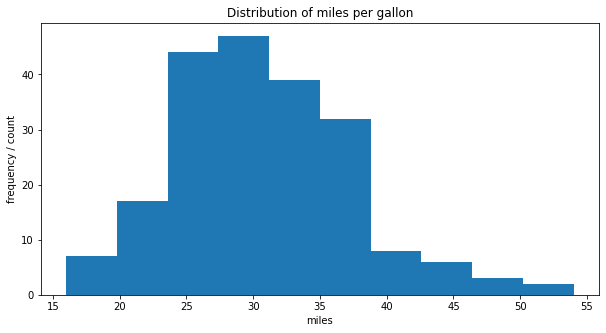

In [51]:
# Histogram

fig, ax = plt.subplots(figsize=(10,5))
ax.hist(x=hmpg_series)
ax.set_title('Distribution of miles per gallon')
ax.set_xlabel('miles')
ax.set_ylabel('frequency / count');
# height of this chart - how many cars within this range.

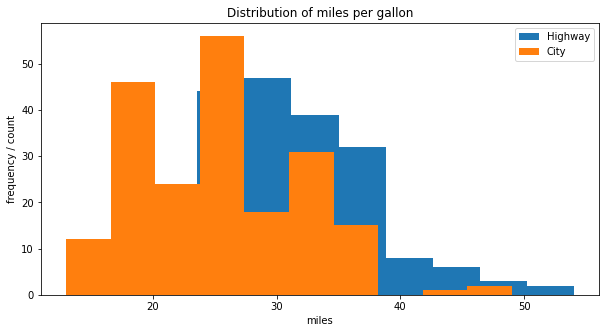

In [54]:
# histogram for highway mileage and city mileage together - superimposed

cmpg_series = df['city-mpg']

fig, ax = plt.subplots(figsize=(10,5))
ax.hist(x=hmpg_series, label='Highway')
ax.hist(x=cmpg_series, label='City')
ax.set_title('Distribution of miles per gallon')
ax.set_xlabel('miles')
ax.set_ylabel('frequency / count')
ax.legend();

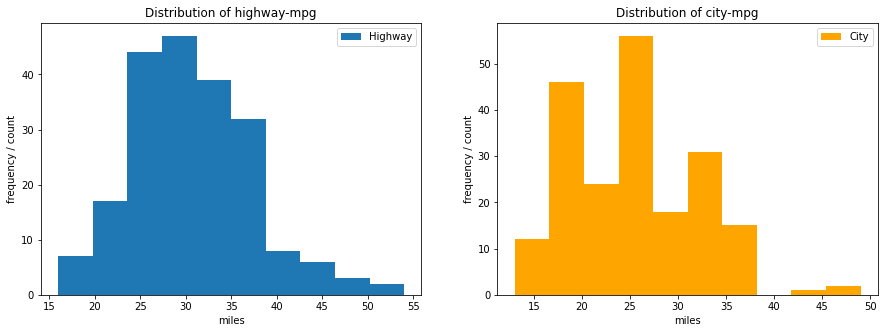

In [66]:
# histogram for highway mileage and city mileage together - side by side
# subplots - (1,2)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) # to refer to each, use indexing
ax[0].hist(x=hmpg_series, label='Highway')
ax[1].hist(x=cmpg_series, label='City',color='orange')
ax[0].set_title('Distribution of highway-mpg')
ax[0].set_xlabel('miles')
ax[0].set_ylabel('frequency / count')
ax[0].legend()
ax[1].set_title('Distribution of city-mpg')
ax[1].set_xlabel('miles')
ax[1].set_ylabel('frequency / count')
ax[1].legend();
# on 1 figure(canvas) there are 2 axis with 2 different charts.

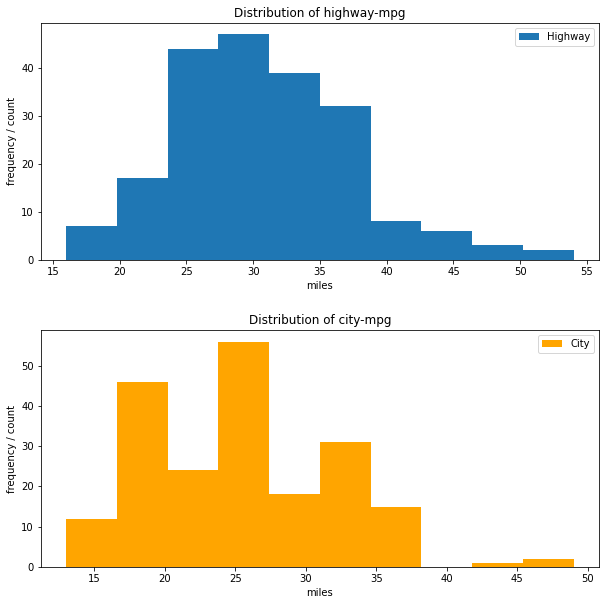

In [94]:
# subplots - (2,1)

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10)) # to refer to each, use indexing
ax[0].hist(x=hmpg_series, label='Highway')
ax[1].hist(x=cmpg_series, label='City',color='orange')
ax[0].set_title('Distribution of highway-mpg')
ax[0].set_xlabel('miles')
ax[0].set_ylabel('frequency / count')
ax[0].legend()
ax[1].set_title('Distribution of city-mpg')
ax[1].set_xlabel('miles')
ax[1].set_ylabel('frequency / count')
ax[1].legend()
plt.subplots_adjust(hspace=0.3);


In Explicit method, fig, ax = plt.subplots() while in Implicit method using pyplot it is plt.subplot() - no s here are end.
In Implicit method, plt.subplot(111), these are subplot grid parameters encoded as a single integer. For example, "111" means "1x1 grid, first subplot & only 1 subplot possible here" and "234" means "2x3 grid, 4th subplot (total 6 plots possible in 2*3 grid) ".
Another e.g.
NOTE: For a 2 x 2 grid, the upper row will use the numbers(2, 2, 1) , (2, 2, 2) and the second row will use the numbers (2, 2, 3) , (2, 2, 4) , respectively. The first two indices are the number of total rows and columns, respectively while the third number specifies the subplot.

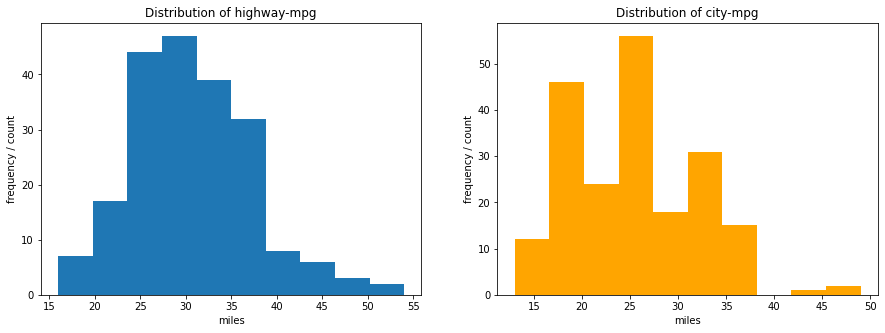

In [102]:
# Histogram using Implicit method

plt.figure(figsize=(15,5))
plt.subplot(121) # meaning 1*2 grid i.e 1 row & 2 col's, so 2 plots possible, this is 1st
plt.hist(hmpg_series)
plt.title('Distribution of highway-mpg')
plt.xlabel('miles')
plt.ylabel('frequency / count')

plt.subplot(122) # meaning 1*2 grid i.e 1 row & 2 col's, so 2 plots possible, this is 2nd
plt.hist(cmpg_series, color='orange')
plt.title('Distribution of city-mpg')
plt.xlabel('miles')
plt.ylabel('frequency / count');

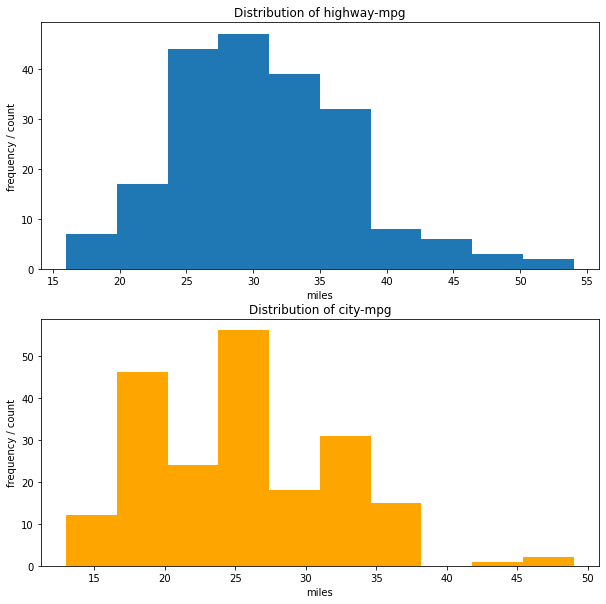

In [104]:

plt.figure(figsize=(10,10))
plt.subplot(211) # meaning 2*1 grid i.e 2 row & 1 col's, so 2 plots possible, this is 1st
plt.hist(hmpg_series)
plt.title('Distribution of highway-mpg')
plt.xlabel('miles')
plt.ylabel('frequency / count')

plt.subplot(212) # meaning 2*1 grid i.e 2 row & 1 col's, so 2 plots possible, this is 2nd
plt.hist(cmpg_series, color='orange')
plt.title('Distribution of city-mpg')
plt.xlabel('miles')
plt.ylabel('frequency / count');

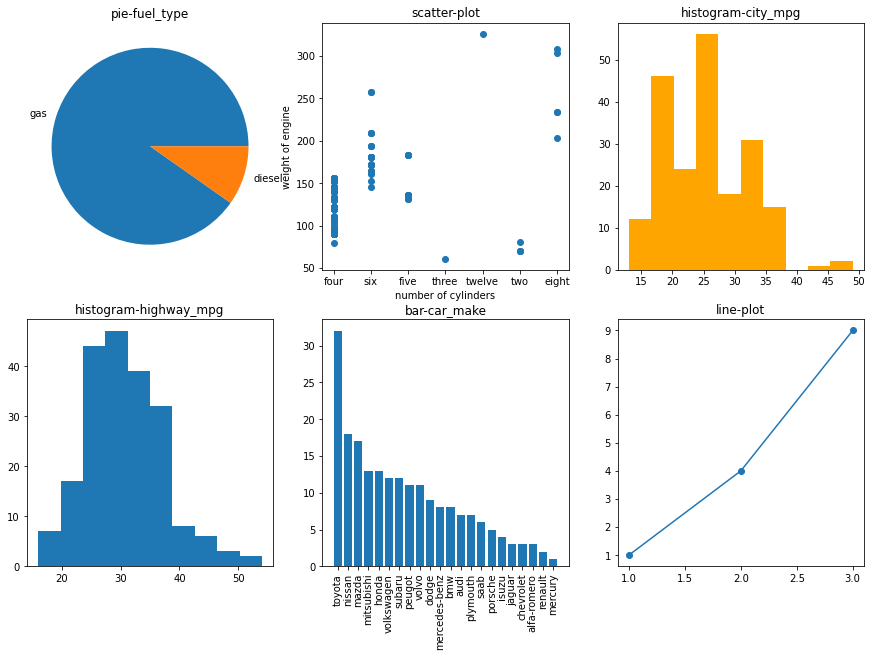

In [145]:
## Example demonstrating usage of subplots(int1, int2, int3) - meaning of 3 integers


plt.figure(figsize=(15,10))

plt.subplot(231)
plt.pie(fuel_series.values,labels=fuel_series.index)
plt.title('pie-fuel_type')

plt.subplot(232)
plt.scatter(x=df['num-of-cylinders'],y=df['engine-size'])
plt.xlabel('number of cylinders')
plt.ylabel('weight of engine')
plt.title('scatter-plot')

plt.subplot(233)
plt.hist(cmpg_series,color='orange')
plt.title('histogram-city_mpg')

plt.subplot(234)
plt.hist(hmpg_series)
plt.title('histogram-highway_mpg')

plt.subplot(235)
plt.bar(make_series.index, make_series.values)
plt.title('bar-car_make')
plt.xticks(rotation=90)

plt.subplot(236)
plt.plot([1,2,3],[1,4,9],marker='o')
plt.title('line-plot');


### Box-Plot
Another way to represent distribution of a variable.

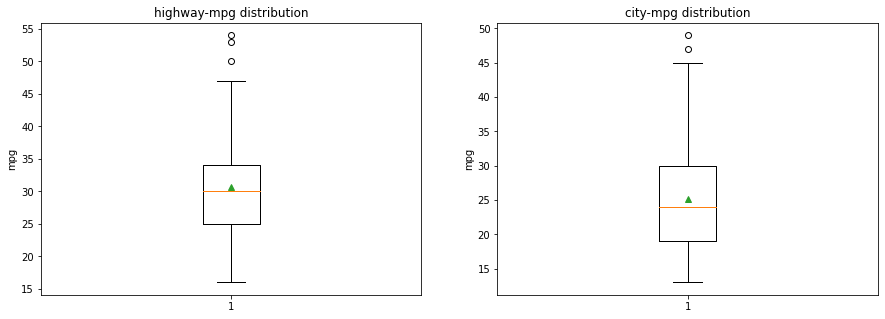

In [157]:
# Box-plot of highway-mpg and city-mpg

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].boxplot(hmpg_series,showmeans=True)
ax[0].set_ylabel('mpg')
ax[0].set_title('highway-mpg distribution')
ax[1].boxplot(cmpg_series,showmeans=True)
ax[1].set_ylabel('mpg')
ax[1].set_title('city-mpg distribution');
